<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/main/Sample_Project_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating Building Drawings Using Image Processing

##1.Edge Detection

###Importing Necessary Libraries For Edge Detection

In [ ]:
#Opencv for Image Processsing
import cv2

#numpy for numerical operations and handling arrays
import numpy as np

#Matplotlib for displaying images
import matplotlib.pyplot as plt #

###Reading Image file in png format from Google Drive

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Research/DATA/CF.png',cv2.IMREAD_GRAYSCALE)



###Converting PNG image to JPG

In [ ]:
img = np.array(img)  # Convert to a NumPy array
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  #

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Displaying Input Image

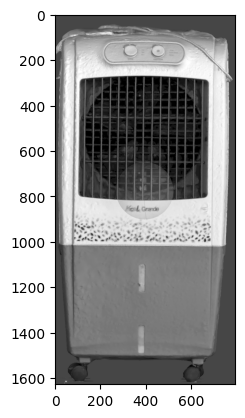

In [ ]:
plt.imshow(img)

###Custom Edge detection Pipeline

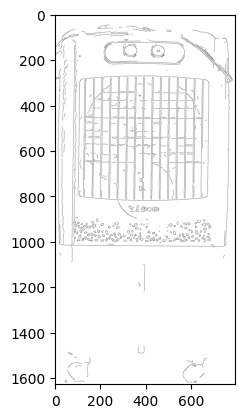

In [ ]:



a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,70,100)
kernel = np.ones((1,1), np.uint8)
dilated = cv2.dilate(im1, kernel, iterations=1)
plt.imshow(dilated,cmap='gray' )
kernel = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
eroded = cv2.erode(im1, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel2, iterations=1)


###Displaying Resultant ontour image

(-0.5, 794.5, 1627.5, -0.5)

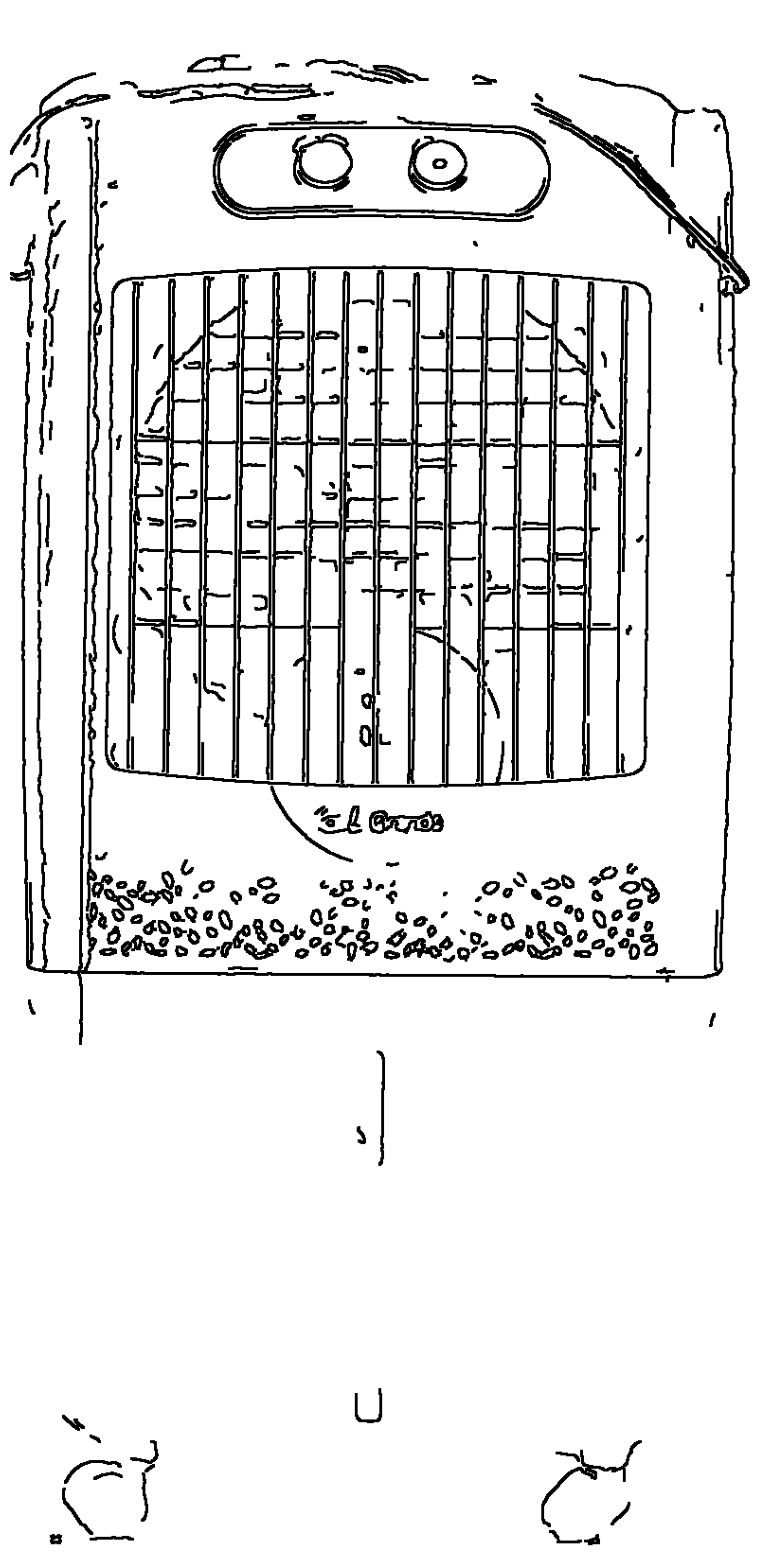

In [ ]:
rimg =dilated.copy()
plt.figure(figsize=(20,20))
plt.imshow(rimg,cmap='gray' )
plt.axis('off')


##2.Converting contour Image to DXF file

###Installing Library required for working with DXF files

In [ ]:
!pip install ezdxf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.5 MB/s eta 0:00:00


###Importing Necessary Libraries

In [ ]:
#Python Imaging Library (PIL) module for image processing
from PIL import Image

#numpy for numerical operations and handling arrays
import numpy as np

#skimage.measure for image analysis and measurement, such as finding contours or regions
from skimage import measure

#Google Colab's files module to upload or download files within a Colab environment
from google.colab import files

#ezdxf to work with DXF files, which are commonly used in CAD applications
import ezdxf


###Loading Image

In [ ]:

# Load the image and convert it to grayscale
img = Image.open("/content/drive/MyDrive/DATA/CE.png").convert("L")
img =dilated.copy()

###Converting Image to binary

In [ ]:
# Convert image to a binary array (black and white
#binary = np.array(img.point(lambda p: p > 128 and 1))
# Assuming img is a NumPy array
binary = (img > 128).astype(int)


###Converting to DXF

In [ ]:
# Find contours using scikit-image
contours = measure.find_contours(binary, level=0.5)

# Create a new DXF document with a specific version
doc = ezdxf.new('R2013')  # 'R2013' corresponds to AutoCAD 2013 (or any other version you prefer)
msp = doc.modelspace()

# Add contours to the DXF
for contour in contours:
    points = [(point[1], -point[0]) for point in contour]  # Flip x and y and invert y-axis
    # Add polyline to the DXF, ensuring it's closed
    polyline = msp.add_lwpolyline(points)
    polyline.close(True)  # Close the polyline



###Downloading DXF File

In [ ]:
# Save the DXF file
dxf_filename = "output.dxf"
doc.saveas(dxf_filename)

# Provide a download link for the DXF file
files.download(dxf_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>